In [1]:
import math

import numpy

from matplotlib import pyplot

%matplotlib inline

In [18]:
N = 100                                

x_start, x_end = -4.0, 4.0            

y_start, y_end = -2.0, 2.0            

x = numpy.linspace(x_start, x_end, N)    

y = numpy.linspace(y_start, y_end, N)    

X, Y = numpy.meshgrid(x, y) 

In [19]:
kappa = 1.0

x_doublet, y_doublet = 0.0, 0.0

In [20]:
def get_velocity_doublet(strength, xd, yd, X, Y):
    """
    Returns the velocity field generated by a doublet.
    
    Parameters
    ----------
    strength: float
        Strength of the doublet.
    xd: float
        x-coordinate of the doublet.
    yd: float
        y-coordinate of the doublet.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    u = - strength/(2*math.pi)*((X-xd)**2-(Y-yd)**2)/((X-xd)**2+(Y-yd)**2)**2
    
    v = - strength/(2*math.pi)*2*(X-xd)*(Y-yd)/((X-xd)**2+(Y-yd)**2)**2
    
    return u, v

def get_stream_function_doublet(strength, xd, yd, X, Y):
    """
    Returns the stream-function generated by a doublet.
    
    Parameters
    ----------
    strength: float
        Strength of the doublet.
    xd: float
        x-coordinate of the doublet.
    yd: float
        y-coordinate of the doublet.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    psi = - strength/(2*math.pi)*(Y-yd)/((X-xd)**2+(Y-yd)**2)
    
    return psi

In [21]:
u_doublet, v_doublet = get_velocity_doublet(kappa, x_doublet, y_doublet, X, Y)

psi_doublet = get_stream_function_doublet(kappa, x_doublet, y_doublet, X, Y)

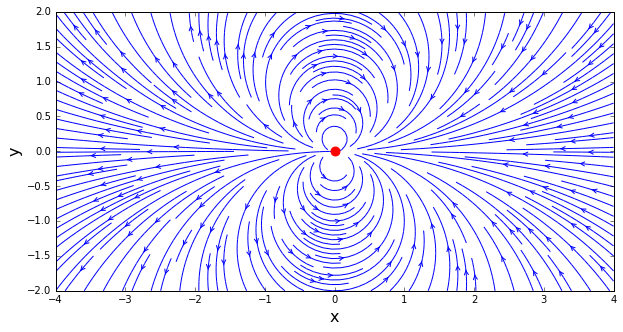

In [22]:
size = 10

pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))

pyplot.xlabel('x', fontsize=16)

pyplot.ylabel('y', fontsize=16)

pyplot.xlim(x_start, x_end)

pyplot.ylim(y_start, y_end)

pyplot.streamplot(X, Y, u_doublet, v_doublet,
                 density=2, linewidth=1, arrowsize=1, arrowstyle='->')

pyplot.scatter(x_doublet, y_doublet, color='r', s=80, marker='o')

In [23]:
u_inf = 1.0

In [24]:
u_freestream = u_inf * numpy.ones((N, N), dtype=float)

v_freestream = numpy.zeros((N, N), dtype=float)

psi_freestream = u_inf * Y